# 链接仪器

In [2]:
%matplotlib notebook
from qulab.sugar import connect
from qulab.job import Job
from qulab.storage.utils import save
import matplotlib.pyplot as plt
import numpy as np, sympy as sy
from collections import namedtuple, deque, defaultdict, OrderedDict, Counter
from scipy.optimize import curve_fit, least_squares as ls
import time, asyncio, sys, imp, pandas as pd
from tqdm import tqdm_notebook as tqdm
from sklearn.cluster import KMeans
# from qulab.wavepoint import WAVE_FORM as WF
from qulab import optimize, measureroutine, computewave, imatrix, waveform_new
# from qulab.optimize import Collect_Waveform 
from qulab.math import opt
# from qulab.waveform import CosPulseDrag, Expi, DC, Step, Gaussian
from qulab.math.qst import transformList, acquireVFromData, vToRho
op = imp.reload(optimize)
mr = imp.reload(measureroutine)
cw = imp.reload(computewave)
mx = imp.reload(imatrix)
wn = imp.reload(waveform_new)
# mn = imp.reload(measureroutine_new)
opt = imp.reload(opt)

In [14]:
awg131 = await connect('AWG131')
awg132 = await connect('AWG132')
awg133 = await connect('AWG133')
awg134 = await connect('AWG134')
# #awg135 = await connect('AWG135')
# awg100 = await connect('AWG100')
ats18 = await connect('ATS18')
# ats19 = await connect('ATS19')
psg101 = await connect('PSG101')
psg230 = await connect('PSG230')
# psg104 = await connect('PSG104')
# psg103 = await connect('PSG103')
psg105 = await connect('PSG105')
psg106 = await connect('PSG106')
dc01 = await connect('DC01')
dc02 = await connect('DC02')
dc03 = await connect('DC03')
dc04 = await connect('DC04')
dc05 = await connect('DC05')
dc06 = await connect('DC06')
dc07 = await connect('DC07')
dc08 = await connect('DC08')
dc10 = await connect('DC10')
dc11 = await connect('DC11')
dc15 = await connect('DC15')
dc20 = await connect('DC20')
att3 = await connect('Att3')
att4 = await connect('Att4')
att5 = await connect('Att5')
att6 = await connect('Att6')
att7 = await connect('Att7')
att8 = await connect('Att8')
att9 = await connect('Att9')
# # #pna = await connect('PNA')

In [15]:
psg_lo = psg105
psg_ex1 = psg106
psg_ex2 = psg106
psg_ex3 = psg106
psg_pump = psg101
psg = {'psg_lo':psg_lo,'psg_ex1':psg_ex1,'psg_ex2':psg_ex2,'psg_ex3':psg_ex3,'psg_pump':psg_pump}
ats = ats18
# awg_trig = awg100
dc = {'dc01':dc01,'dc02':dc02,'dc03':dc03,'dc05':dc05,'dc06':dc06,\
      'dc07':dc07,'dc08':dc08,'dc10':dc10,'dc11':dc11,'dc15':dc15,'dc20':dc20}
#awg = awg132
attinst = {'com3':att3,'com4':att4,'com5':att5,'com6':att6,'com7':att7,'com8':att8,'com9':att9}
awg_list = {'awg131':awg131,'awg132':awg132,'awg133':awg133,'awg134':awg134,'awgread':awg133}

In [22]:
measure = mr.common(1,ats,dc,psg,awg_list,attinst,1,[])

In [4]:
async def resn(f_cavity):
    f_lo = f_cavity.max() + 50e6
    delta =  f_lo - f_cavity 
    n = len(f_cavity)
    return f_lo, delta, n

In [5]:
f_cavity = np.array([6.505,6.518,6.531,6.544,6.559,6.573,6.587,6.600,6.605,6.630])*1e9
f_lo, delta, n = await resn(f_cavity)
delta

NameError: name 'resn' is not defined

In [12]:
# delta = np.array([1.75e+08, 1.62e+08, 1.49e+08, 1.36e+08, 1.21e+08, 1.07e+08,
#        9.30e+07, 8.00e+07, 7.50e+07, 5.00e+07])
delta = np.array([f_medium])
await cw.modulation_read(measure,delta,tdelay=1500)
# await mr.ats_setup(ats,delta,l=1500)
await awg133.run()
f_list = await ats.getValue('f_list')
f_list

array([50000000.])

In [26]:
state = await mr.QueryInst(measure)
pd.DataFrame(state)

,dc01,dc02,dc03,dc05,dc06,dc07,dc08,dc10,dc11,dc15,dc20,psg_lo,psg_ex1,psg_ex2,psg_ex3,psg_pump
error,+0,+0,+0,+0,+0,+0,+0,+0,+0,+0,+0,0,0,0,0,0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.800000GHz,4.654700GHz,4.654700GHz,4.654700GHz,13.502000GHz
load,high Z,high Z,high Z,high Z,high Z,high Z,high Z,high Z,high Z,high Z,high Z,NaN,NaN,NaN,NaN,NaN
mform,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXT,EXT,EXT,EXT,EXT2
moutput,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
offset,0,0,0,0,0,0,0,0,0,10,0,NaN,NaN,NaN,NaN,NaN
output,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1
power,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000dBm,15.000000dBm,15.000000dBm,15.000000dBm,-0.500000dBm


In [11]:
await psg_lo.setValue('Power',5)

In [21]:
await dc05.DC(0)

In [22]:
for i in np.arange(100):
    await psg_lo.query('syst:err?')

# 中频及pump频率

In [9]:
f_medium, f_center, dc_inst = 50e6, 6.75e9, dc15

# 测背底

In [14]:
async def S21(freq):
    await psg_lo.setValue('Output','ON')
    for i in freq:
        await psg_lo.setValue('Frequency', i)
#         pulse = await cw.modulation_read(measure,np.array([i]),tdelay=1500)
        ch_A, ch_B,I,Q = await ats.getIQ(hilbert=False,offset=True)
        Am, Bm = ch_A.mean(axis=0),ch_B.mean(axis=0)
#         time.sleep(1)
#         theta0 = np.angle(Am) - np.angle(Bm)
#         Bm *= np.exp(1j*theta0)
        s = Am + 1j*Bm
        yield [i-50e6], s

In [15]:
# freq = np.linspace(-300,400,701)*1e6 + 6.3e9 + 80e6
freq = np.linspace(6e9, 7.5e9, 1001) + f_medium
# freq = np.linspace(10,250,241)*1e6
# freq = [f_lo]
tag = 'jpa'
# await psg_lo.setValue('Frequency', 6.5e9)
# mr.Att_Setup(measure,"COM8").Att(20)
await dc_inst.DC(0)
await psg_pump.setValue('Output','OFF')
job = Job(S21, (freq,), tags=[tag], max=len(freq))
f, base = await job.done()

Output()

<IPython.core.display.Javascript object>


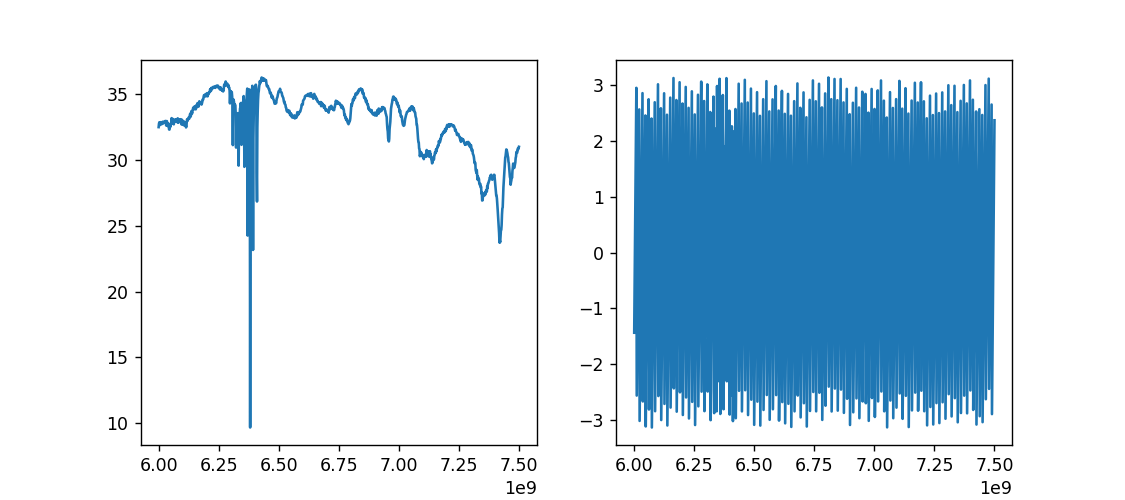

In [16]:
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
axes[0].plot(f,20*np.log10(np.abs(base[:,0])))
axes[1].plot(f,np.angle(base[:,0]))
plt.show()

In [19]:
np.shape(base)

(1601, 1)

<IPython.core.display.Javascript object>


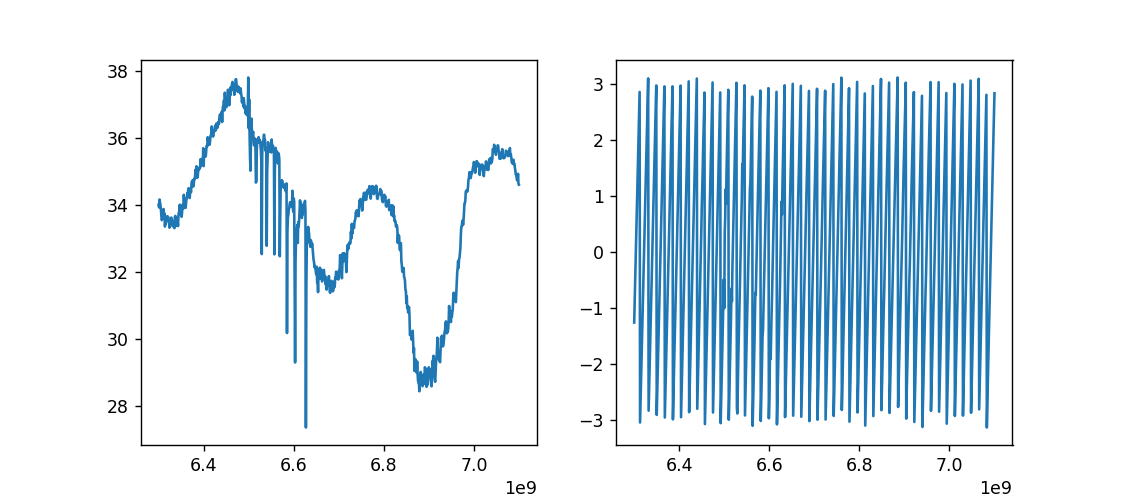

In [13]:
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
axes[0].plot(f[:,0],20*np.log10(np.abs(base[:,0])))
axes[1].plot(f[:,0],np.angle(base[:,0]))
plt.show()

<IPython.core.display.Javascript object>


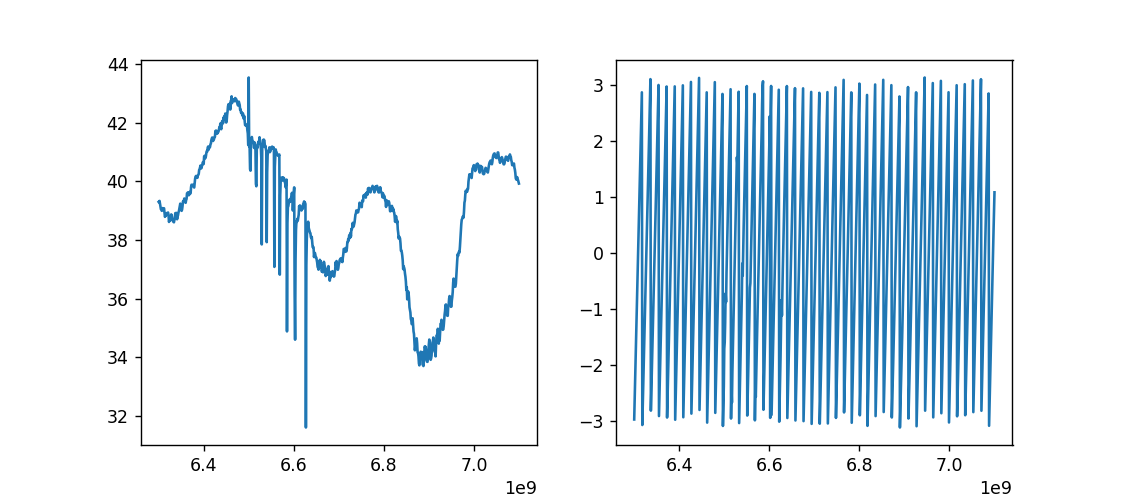

In [78]:
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
axes[0].plot(f[:,0],20*np.log10(np.abs(base[:,0])))
axes[1].plot(f[:,0],np.angle(base[:,0]))
plt.show()

<IPython.core.display.Javascript object>


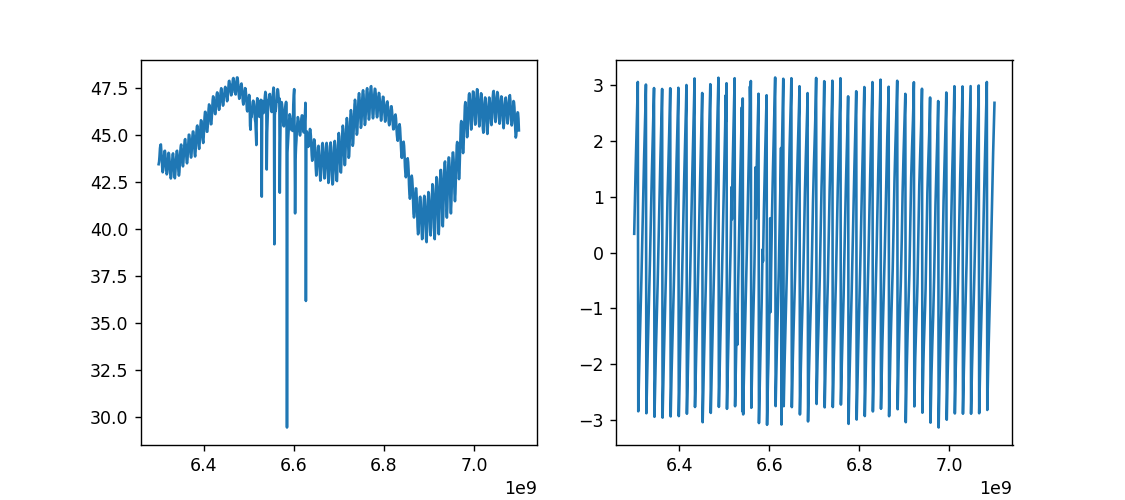

In [17]:

fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
axes[0].plot(f[:,0],20*np.log10(np.abs(base[:,0])))
axes[1].plot(f[:,0],np.angle(base[:,0]))
plt.show()

In [55]:
# f_cavity = np.array([6.505,6.518,6.531,6.544,6.559,6.573,6.587,6.600,6.605,6.630])*1e9 + 50e6

array([6.10e+09, 6.25e+09, 6.35e+09, 6.45e+09, 6.65e+09])

# S21vsFlux

In [17]:
async def S21vsFlux(freq,current):
    await psg_ex1.setValue('Output','OFF')
    await psg_pump.setValue('Output','OFF')
    await psg_lo.setValue('Output','ON')
    for i in current:
        await dc02.DC(i)
        job = Job(S21, (freq,),auto_save=False, no_bar=True, tags=['test'], max=len(freq))
        f_s21, s_s21 = await job.done()
        yield [i]*1, f_s21, s_s21

In [ ]:
#freq = np.linspace(-500,500,1001)*1e6 + 6.3e9
current = np.linspace(-2.5,2.5,26)
job = Job(S21vsFlux, (freq,current), tags=['suff'], max=len(current))
volt, f_bias, s_bias = await job.done()

Output()

In [35]:
await dc03.DC(0)

## 扣除相位

<IPython.core.display.Javascript object>


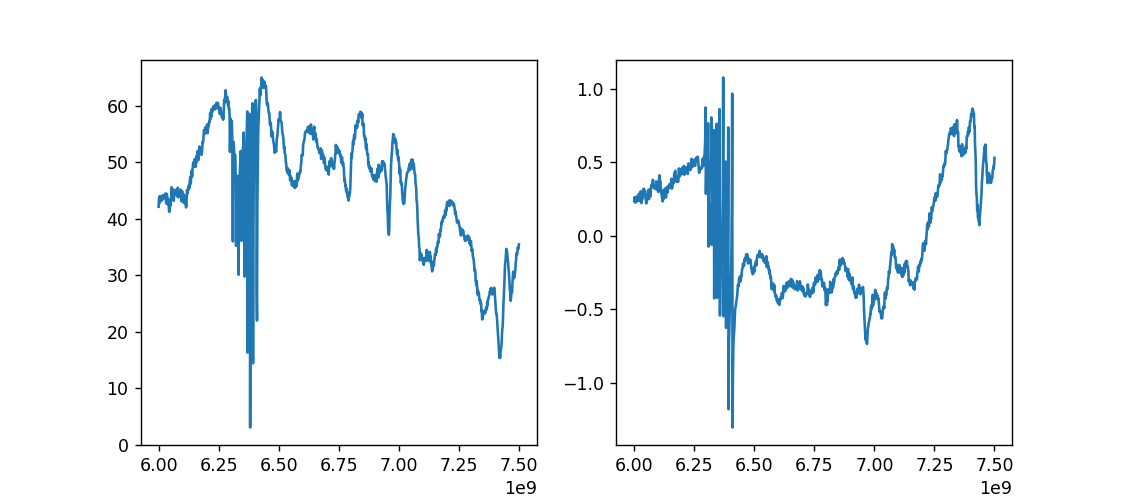

In [17]:
phi = np.unwrap(np.angle(base[:,0]), 0.9 * np.pi)
phase = np.poly1d(np.polyfit(f[:,0], phi, 1))
s21_base = base[:,0] / np.exp(1j * phase(f[:,0]))
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
axes[0].plot(f[:,0],np.abs(s21_base))
axes[1].plot(f[:,0],np.angle(s21_base))
plt.show()

In [39]:
s21 = []
for i in s_bias[:,:,0]:
    phi = np.unwrap(np.angle(i), 0.9 * np.pi)
    phase = np.poly1d(np.polyfit(f[:,0], phi, 1))
    sm = i / np.exp(1j * phase(f[:,0]))
    s21.append(sm)
s21 = np.array(s21)

NameError: name 's_bias' is not defined

## 扣除背底

<IPython.core.display.Javascript object>


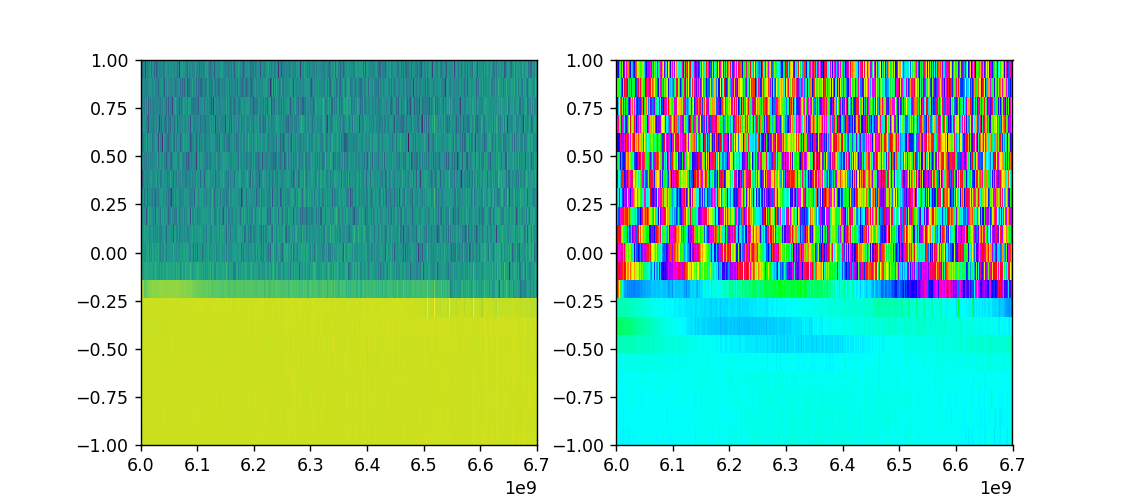

In [18]:
%matplotlib notebook
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
extent = [np.min(f_bias),np.max(f_bias),np.min(volt),np.max(volt)]
axes[0].imshow(20*np.log10(np.abs(s21/s21_base)),extent=extent,aspect='auto',origin='lower')
axes[1].imshow(np.angle(s21/s21_base),extent=extent,aspect='auto',origin='lower',cmap='hsv')
plt.show()

# BiasvsPump

In [27]:
deltaw = 0e6
await psg_pump.setValue('Output','OFF')
await cw.modulation_read(measure,np.array([f_medium]),tdelay=1500)
await psg_lo.setValue('Frequency',(f_center+deltaw+f_medium))
await dc_inst.DC(0)
ch_A, ch_B, I, Q= await ats.getIQ()
Am, Bm = ch_A.mean(axis=0),ch_B.mean(axis=0)
theta0 = np.angle(Am) - np.angle(Bm)
Bm *= np.exp(1j*theta0)
base_single = Am + Bm
base_single = base_single / np.exp(1j * phase(f_center+deltaw))
print(await ats.getValue('f_list'))

[50000000.]


In [21]:
async def SingleBias(bias):
    await psg_lo.setValue('Output','ON')
    await psg_lo.setValue('Frequency',(f_center+deltaw+f_medium))
    for i in bias:
        await dc_inst.DC(i)
        ch_A, ch_B, I, Q = await ats.getIQ()
        Am, Bm = ch_A.mean(axis=0),ch_B.mean(axis=0)
        theta0 = np.angle(Am) - np.angle(Bm)
        Bm *= np.exp(1j*theta0)
        s = Am + Bm
        yield [i], s / np.exp(1j * phase(f_center+deltaw))

In [22]:
async def BiasvsPump(bias,pump):
#     await psg_ex.setValue('Output','OFF')
    await psg_pump.setValue('Output','ON')
    await psg_pump.setValue('Frequency',(2*(f_center+deltaw)+2e6))
    for i in pump:
        await psg_pump.setValue('Power',i)
        job = Job(SingleBias, (bias,),auto_save=False, no_bar=True, tags=['test'], max=len(bias))
        v_sb, s_sb = await job.done()
        yield [i]*1, v_sb, s_sb

In [28]:
power = np.linspace(-5,10,151)
current = np.linspace(-3.5,-0.5,61)
job = Job(BiasvsPump, (current,power), tags=[tag], max=len(power))
p_pump, v_pump, s_pump = await job.done()

Output()

<IPython.core.display.Javascript object>


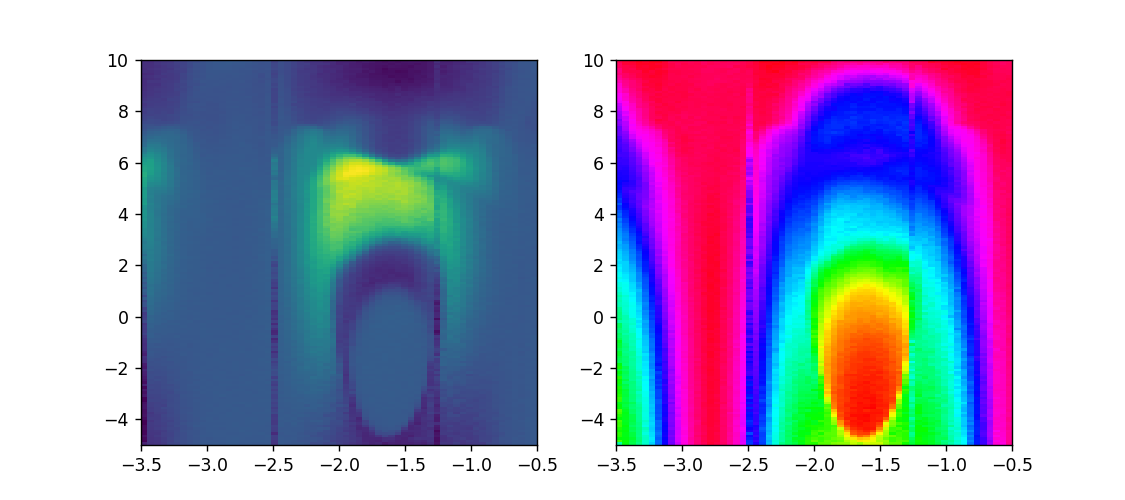

In [29]:
s = (s_pump[:,:,0] / base_single) #检查shape
%matplotlib notebook
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
extent = [np.min(v_pump),np.max(v_pump),np.min(p_pump),np.max(p_pump)]
axes[0].imshow(20*np.log10(np.abs(s)),extent=extent,aspect='auto',origin='lower')
axes[1].imshow(np.angle(s),extent=extent,aspect='auto',origin='lower',cmap='hsv')
plt.show()

In [ ]:
help

In [30]:
index = np.argmax(np.abs(s))
c_op, p_op = current[index%len(current)],power[index//len(current)]
print('current=%f, power=%f'%(c_op,p_op))

current=-1.850000, power=5.700000


In [32]:
c_op, p_op = -0.24, 22.5

## 单条检测

In [120]:
freq = np.linspace(6.3e9, 7.1e9, 801) + f_medium

Output()

<IPython.core.display.Javascript object>


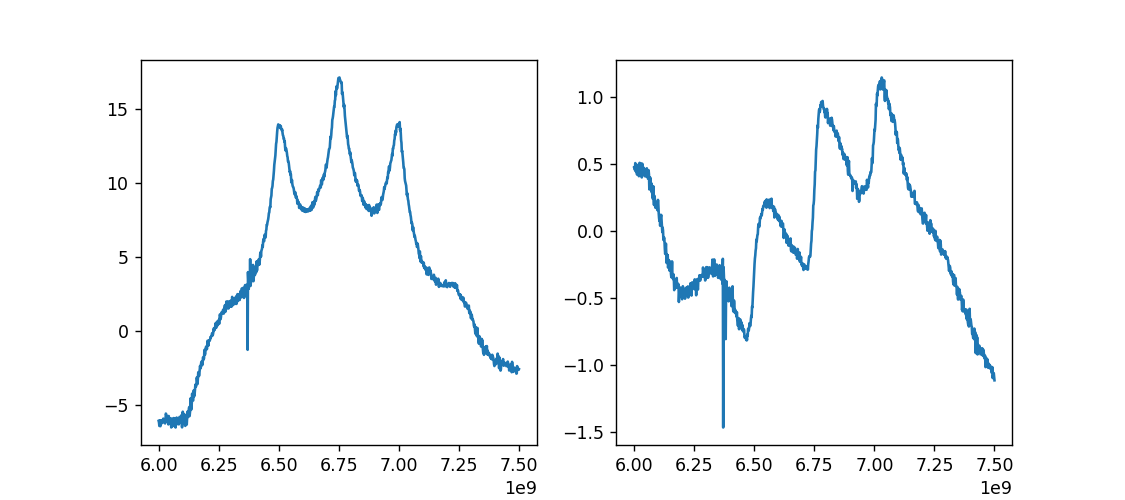

In [53]:
await dc_inst.DC(c_op)
await psg_pump.setValue('Power',p_op)
await psg_pump.setValue('Frequency',2*(f_center+deltaw)+2e6)
await psg_pump.setValue('Output','ON')
await cw.modulation_read(measure,np.array([f_medium]),tdelay=1500)
job = Job(S21, (freq,), tags=[tag], max=len(freq))
f_test, s_test = await job.done()
f_tests, s_tests = op.RowToRipe().deductPhase(f_test[:,0],s_test[:,0])
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
axes[0].plot(f_tests,20*np.log10(np.abs(s_tests[0]/s21_base)))
axes[1].plot(f_tests,np.angle(s_tests[0]/s21_base))
plt.show()

In [40]:
x_off, y_off = f_tests,20*np.log10(np.abs(s_tests[0]/s21_base))

In [44]:
x_on, y_on = f_tests,20*np.log10(np.abs(s_tests[0]/s21_base))

In [46]:
y_diff = y_on-y_off

In [56]:
fig = plt.figure(num='test')
plt.plot(x_off[:800],y_off[:800],label='pump off')
# axes[1].plot(f_tests,np.angle(s_tests[0]/s21_base))
plt.xlabel('Freq/GHZ')
plt.ylabel('Gain/dB')
plt.title('jpa Gain')
plt.show()

<IPython.core.display.Javascript object>


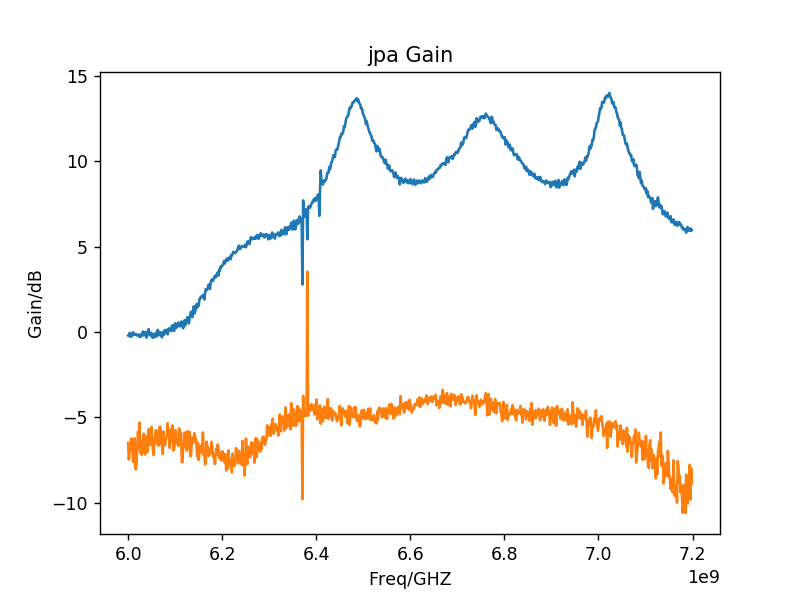

In [54]:
fig = plt.figure(num='test')

In [122]:
await dc_inst.DC(-0.396)
await psg_pump.setValue('Power',23.3)
await psg_pump.setValue('Frequency',2*6.57e9+2e6)
await psg_pump.setValue('Output','ON')

In [29]:
f_cavity

array([6.43e+09, 6.53e+09, 6.58e+09, 6.68e+09, 6.78e+09, 6.88e+09])

## 单纯形法

In [31]:
deltan = int(0e6/1e6)
# f_cavity = np.array([freq[(70+deltan)],freq[(250+deltan)],freq[(300+deltan)],freq[(400+deltan)],freq[(500+deltan)],freq[(550+deltan)]])
# f_cavity = np.array([freq[(50+deltan)],freq[(150+deltan)],freq[(200+deltan)],freq[(300+deltan)],freq[(400+deltan)],freq[(500+deltan)]])
f_cavity = np.array([6.298,6.309,6.322,6.332,6.344,6.356,6.371,6.381,6.393,6.409])*1e9
tag = 'jpa'
await dc_inst.DC(0)
await psg_pump.setValue('Output','OFF')
job = Job(S21, (f_cavity,), tags=[tag], max=len(f_cavity))
f_sn, base_sn = await job.done()
base_sn = base_sn[:,0] / np.exp(1j * phase(f_sn[:,0]))

Output()

In [33]:
async def Gain(bias,power):
    global f_cavity
    await dc_inst.DC(bias)
    await psg_pump.setValue('Power',power)
    job = Job(S21, (f_cavity,), tags=[tag], max=len(f_cavity),no_bar=True)
    f_tests, s_tests = await job.done()
    s_tests = s_tests[:,0] / np.exp(1j * phase(f_tests[:,0]))
    index = np.abs(s_tests/base_sn).argmin()
    return -20*np.log10(np.abs(s_tests[index]/base_sn[index]))

In [49]:
async def SNR(bias,power):
    global f_cavity
    await dc_inst.DC(bias)
    await psg_pump.setValue('Power',power)
    s_tests = []
    for i in f_cavity:
        await psg_lo.setValue('Frequency',i)
        ch_A, ch_B, I, Q = await ats18.getIQ()
        s = ch_A + 1j*ch_B
        s = s / np.exp(1j * phase(i))
        s_tests.append(np.abs(s.mean())/np.std(s))
#     snr = np.abs(np.mean(np.array(s_tests) ,axis=1)) / np.std(np.array(s_tests),axis=1) 
    snr = np.min(s_tests)
#     return -np.min(snr[:,0])
    return -snr
#     return bias**2 + power**2

In [34]:
await psg_pump.setValue('Output','ON')
await cw.ats_setup(ats18,np.array([f_medium]),l=1500,repeats=500)
ret = opt.optimize(Gain,[c_op,p_op],[0.1,0.1],[3,2],print_info=True,algorithm='minimize')
print(ret.x)

Output()

.o
[-1.85  5.7 ] -0.8953860924695918   

Output()

.

Output()

.o
[-1.85  5.8 ] -1.3588275220534576   

Output()

.o
[-1.95  5.8 ] -3.3751345318626886   

Output()

.o
[-2.05  5.85] -4.8670350214434785   

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.o
[-2.045  5.82 ] -4.8986854453708615   

Output()

.o
[-2.049  5.78 ] -4.945889348516323   

Output()

.o
[-2.066  5.75 ] -4.988782234701977   

Output()

.o
[-2.083  5.69 ] -5.04696995235645   

Output()

.o
[-2.082  5.62 ] -5.10989430533554   

Output()

.o
[-2.099  5.5  ] -5.166122912331335   

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.o
[-2.102  5.49 ] -5.186021694899546   

Output()

.o
[-2.095  5.54 ] -5.204917373039076   

Output()

.

Output()

.

Output()

.

Output()

.o
[-2.099  5.51 ] -5.240348166408555   

Output()

.

Output()

...

Output()

.

Output()

..

Output()

..............................
 CacheInfo(hits=32, misses=45, maxsize=128, currsize=45)
[-2.099  5.51 ]


## 多条检测

In [36]:
async def SingleS21(current,freq):
    for i in current:
        await dc03.DC(i)
        job = Job(S21, (freq,), tags=[tag],no_bar = True, max=len(freq))
        f_test, s_test = await job.done()
        yield [i], f_test, s_test

In [21]:
current = np.linspace(-0.04,0.08,61)
await psg_pump.setValue('Power',-5)
await psg_pump.setValue('Output','ON')
await psg_lo.setValue('Output','ON')
job = Job(SingleS21, (current,freq), tags=[tag], max=len(current))
v_test, f_test, s_test = await job.done()

Output()

In [22]:
await dc03.DC(0)
await psg_pump.setValue('Output','OFF')

<IPython.core.display.Javascript object>


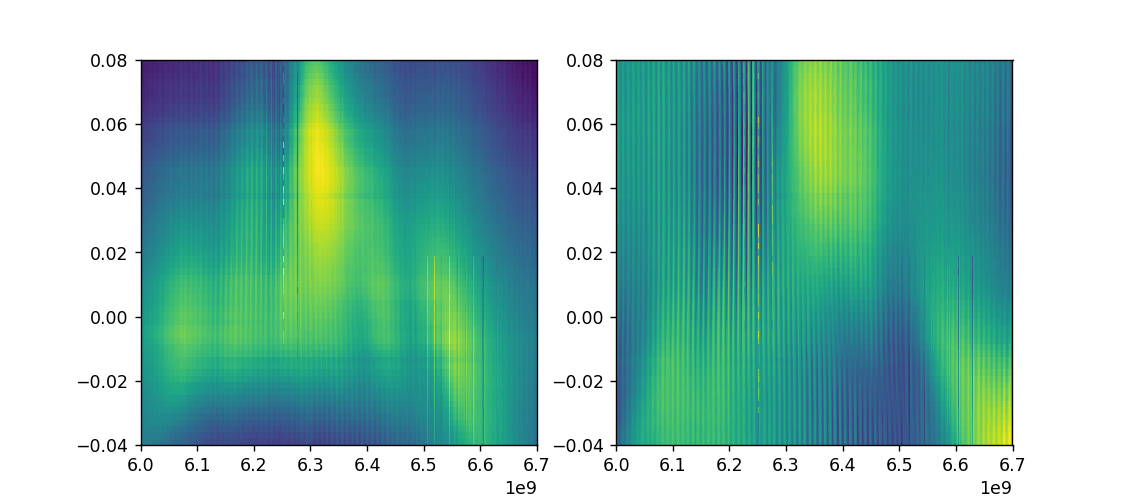

In [24]:
f_testn, s_testn = op.RowToRipe().deductPhase(f_test[:,:,0][0],s_test[:,:,0])

fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
extent = [np.min(f_testn),np.max(f_testn),np.min(v_test),np.max(v_test)]
axes[0].imshow(20*np.log10(np.abs(s_testn/s21_base)),extent=extent,origin='lower',aspect='auto')
axes[1].imshow(np.angle(s_testn/s21_base),extent=extent,origin='lower',aspect='auto')
plt.show()

In [414]:
fig, axes = plt.subplots(ncols=2,nrows=(len(current)//2+len(current)%2),figsize=(9,2*(len(current)//2+len(current)%2)))
for j, i in enumerate(s_test):
    axes[j//2][j%2].plot(f_test,20*np.log10(np.abs(i/s21_base)))
    axes[j//2][j%2].settitle('%d'%j)
    #axes[j//2][1].plot(f_test,np.angle(i/s21_base))
plt.show()

# S21vsPump

In [400]:
async def S21vsPump(freq,pump):
    await psg_ex.setValue('Output','OFF')
    await psg_pump.setValue('Output','ON')
    await psg_lo.setValue('Output','ON')
    for i in pump:
        await psg_pump.setValue('Power',i)
        job = Job(S21, (freq,),auto_save=False, no_bar=True, tags=['test'], max=len(freq))
        f_s21, s_s21 = await job.done()
        yield [i]*1, f_s21, s_s21

In [401]:
power = np.linspace(-0.5,0.5,21) + p_op
await dc03.DC(-0.012)
job = Job(S21vsPump, (freq,power), tags=[tag], max=len(power))
p_p, f_p, s_p = await job.done()

Output()

In [404]:
f_pn, s21_pump = op.RowToRipe().deductPhase(f_p[:,:,0][0],s_p[:,:,0])

<IPython.core.display.Javascript object>


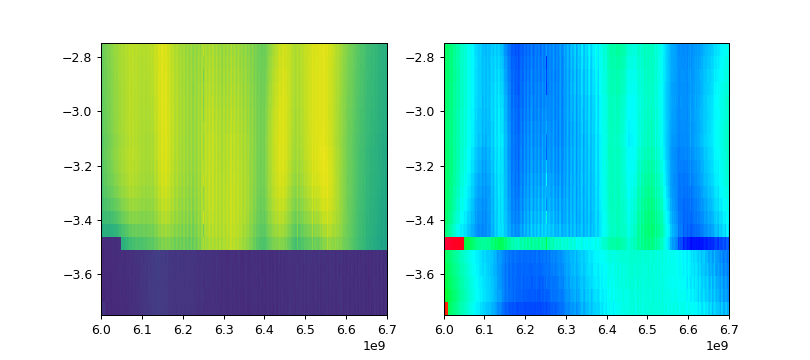

In [405]:
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
extent = [np.min(f_pn),np.max(f_pn),np.min(p_p),np.max(p_p)]
axes[0].imshow(20*np.log10(np.abs(s21_pump/s21_base)),extent=extent,aspect='auto',origin='lower')
axes[1].imshow(np.angle(s21_pump/s21_base),extent=extent,aspect='auto',origin='lower',cmap='hsv')
plt.show()

In [415]:
# fig, axes = plt.subplots(ncols=2,nrows=(len(power)//2+len(power)%2),figsize=(9,2*(len(power)//2+len(power)%2)))
# for j, i in enumerate(s21_pump):
#     axes[j//2][j%2].plot(f_pn,20*np.log10(np.abs(i/s21_base)))
#     axes[j//2][j%2].set_title('%d'%j)
#     #axes[j//2][1].plot(f_test,np.angle(i/s21_base))
# plt.show()

In [416]:
power[11]

-3.2

# 噪声

In [ ]:
Tp = (Y - 1) / Gp / Gi**2 / Ga * Th  #Th=4K, Ga线的衰减， Gi环形器的插入损耗， Gp：JPA增益

In [43]:
async def NoiseFreq(freq,Gi, Ga, Th):

    for j, i in enumerate(freq):
        await psg_lo.setValue('Frequency',i)
        #JPA打开
        await psg_pump.setValue('Output','ON')
        time.sleep(0.1)
        ch_A, ch_B, I, Q = await ats.getIQ()
        son = ch_A + 1j*ch_B
        son /= base[j,0]
        
        #JPA关上
        await psg_pump.setValue('Output','OFF')
        time.sleep(0.1)
        ch_A, ch_B, I, Q = await ats.getIQ()
        soff = ch_A + 1j*ch_B
        soff /= base[j,0]
        
        sigma_on = np.std(son)
        sigma_off = np.std(soff)
        Gp = 20*np.log10(np.abs(son.mean())/np.abs(soff.mean()))
        Y = sigma_on**2 / sigma_off**2
#         print(Gp,Y)
        Tp = (Y - 1) / Gp / Gi / Ga * Th
#         print(Y,Gp,np.shape(son))
        yield [i-80e6],[Tp]

In [44]:
freq = np.linspace(6.3e9, 7.1e9, 801) + 80e6
Gi, Ga, Th = -1, -1, 4
await dc03.DC(-0.273)
await psg_pump.setValue('Power',22.1)
await psg_pump.setValue('Frequency',2*6.58e9+2e6)
await psg_pump.setValue('Output','ON')
await cw.modulation_read(measure,np.array([80e6]),tdelay=1500)
await cw.ats_setup(ats18,np.array([80e6]),l=1500,repeats=1000)
job = Job(NoiseFreq, (freq,Gi, Ga, Th), tags=['jpa'], max=len(freq))
f_nf, T_nf = await job.done()

Output()

<IPython.core.display.Javascript object>


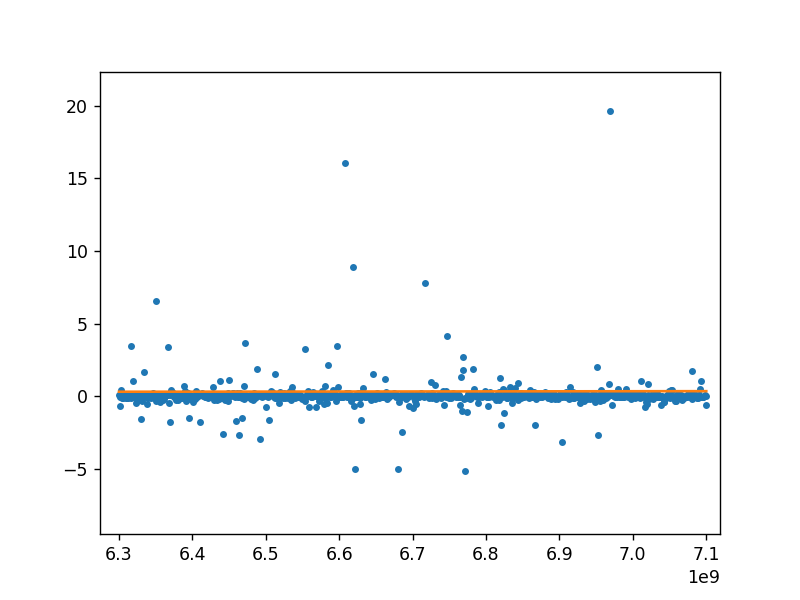

In [45]:
from scipy import constants as const
fig  = plt.figure()
plt.plot(f_nf,T_nf,'.')
plt.plot(f_nf[:,0],const.h*f_nf[:,0]/const.k)
plt.show()

<IPython.core.display.Javascript object>


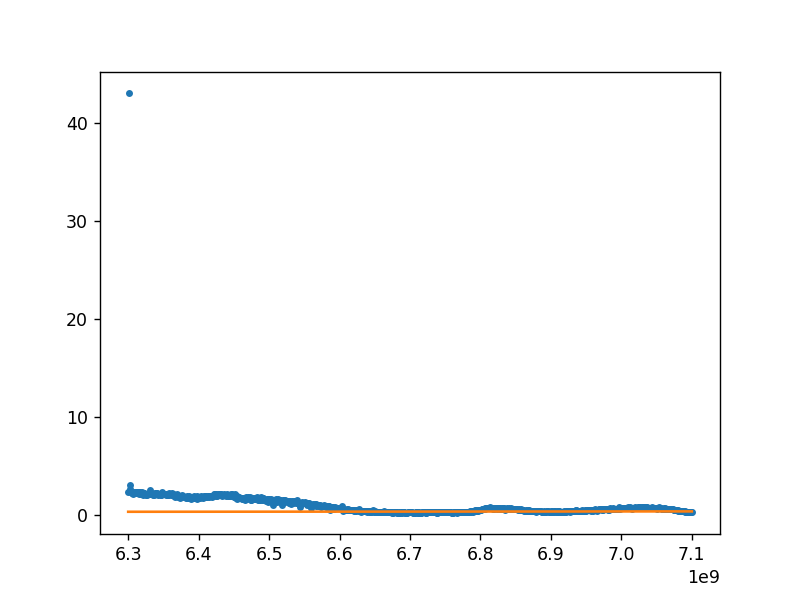

In [116]:
from scipy import constants as const
fig  = plt.figure()
plt.plot(f_nf,T_nf,'.')
plt.plot(f_nf[:,0],const.h*f_nf[:,0]/const.k)
plt.show()

In [115]:
const.h*f_nf[:,0]

array([4.17442413e-24, 4.17508673e-24, 4.17574934e-24, 4.17641195e-24,
       4.17707455e-24, 4.17773716e-24, 4.17839977e-24, 4.17906237e-24,
       4.17972498e-24, 4.18038759e-24, 4.18105020e-24, 4.18171280e-24,
       4.18237541e-24, 4.18303802e-24, 4.18370062e-24, 4.18436323e-24,
       4.18502584e-24, 4.18568844e-24, 4.18635105e-24, 4.18701366e-24,
       4.18767627e-24, 4.18833887e-24, 4.18900148e-24, 4.18966409e-24,
       4.19032669e-24, 4.19098930e-24, 4.19165191e-24, 4.19231451e-24,
       4.19297712e-24, 4.19363973e-24, 4.19430234e-24, 4.19496494e-24,
       4.19562755e-24, 4.19629016e-24, 4.19695276e-24, 4.19761537e-24,
       4.19827798e-24, 4.19894058e-24, 4.19960319e-24, 4.20026580e-24,
       4.20092841e-24, 4.20159101e-24, 4.20225362e-24, 4.20291623e-24,
       4.20357883e-24, 4.20424144e-24, 4.20490405e-24, 4.20556665e-24,
       4.20622926e-24, 4.20689187e-24, 4.20755448e-24, 4.20821708e-24,
       4.20887969e-24, 4.20954230e-24, 4.21020490e-24, 4.21086751e-24,
      

# 饱和功率

In [32]:
async def SaturationPower(signalpower,):
    for i in signalpower:
        await measure.attinst['com8'].set_att(i)
        sm = []
        for j in ['OFF','ON']:
#             await dc_inst.DC(j[0])
            await psg_pump.setValue('Output',j)
            ch_A, ch_B,I,Q = await ats.getIQ()
            Am, Bm = ch_A.mean(axis=0),ch_B.mean(axis=0)
            theta0 = np.angle(Am) - np.angle(Bm)
            Bm *= np.exp(1j*theta0)
            s = Am + Bm
            sm.append(s)
        yield [i]*10, sm

In [33]:
# att_setup = mr.Att_Setup(measure,"COM7")
signalpower = np.linspace(0,40,81)
await psg_pump.setValue('Power',5.81)
await dc_inst.DC(-2.142)
# await psg_pump.setValue('Frequency',(2*6.75e9+2e6))
job = Job(SaturationPower, (signalpower,), tags=['jpa'], max=len(signalpower))
a_sp, s_sp = await job.done()
# att_setup.close()

Output()

In [51]:
await dc03.DC(0)
await psg_pump.setValue('Output','OFF')

In [34]:
readpower, singalgain = a_sp,20*np.log10(np.abs(s_sp[:,1,:]/s_sp[:,0,:]))

<IPython.core.display.Javascript object>


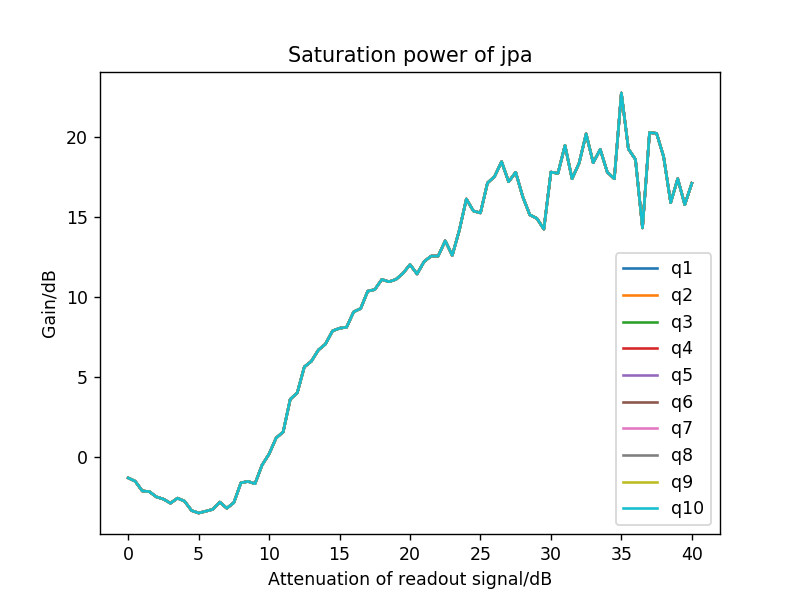

In [35]:
fig = plt.figure()
plt.plot(a_sp,20*np.log10(np.abs(s_sp[:,1,:]/s_sp[:,0,:])))
plt.legend(loc=4,labels=['q%d'%(i+1) for i in range(10)])
plt.title('Saturation power of jpa')
plt.ylabel('Gain/dB')
plt.xlabel('Attenuation of readout signal/dB')
plt.show()

In [48]:
await ats.getValue('f_list')

array([1.75e+08, 1.62e+08, 1.49e+08, 1.36e+08, 1.21e+08, 1.07e+08,
       9.30e+07, 8.00e+07, 7.50e+07, 5.00e+07])

In [54]:
f_lo

6680000000.0

In [72]:
from scipy.optimize import basinhopping